In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pygimli.physics import SIP
import pybert as pb

In [2]:
def compareTDFD(f=None, t=None, taus=None, **synthCC):
    # %% define Cole-Cole model
    synthCC.setdefault("rho", 1)
    t = t or np.logspace(-2, 0.6, 30)
    f = f or np.logspace(-2, 2, 40)
    taus = taus or np.logspace(-3, +2, 50)
    decay = pb.Decay(t=t)
    decay.v = decay.simulate(**synthCC)
    decay.invert()
    decay.decompose(error=0.01, tau=taus)
    rhoC = SIP.modelColeColeRho(f, **synthCC)
    spec = SIP.SIPSpectrum(f=f, amp=np.abs(rhoC), phi=-np.angle(rhoC))
    spec.fitColeCole()
    spec.fitDebyeModel(tau=taus, new=False)   
    fig, ax = plt.subplots()
    ax.semilogx(taus, decay.modelDD, "x-", label="TD")
    ax.semilogx(taus, spec.mDD, "+-", label="FD")
    ax.vlines(decay.logMeanTau(), *ax.get_ylim(), color="C0", ls="dashed")
    ax.vlines(spec.logMeanTau(), *ax.get_ylim(), color="C1", ls="dashed")
    ax.vlines(synthCC["tau"], *ax.get_ylim(), color="red", ls="dashed")
    ax.grid()
    ax.legend()
    print("Cole-Cole")
    keys = list(synthCC.keys())
    for i in range(-3, 0):
        key = keys[i]
        print(key, synthCC[key], decay.modelCC[i], spec.mCC[i])
        # print(synthCC)
    print("Debye")
    print("logMeanTau=", decay.logMeanTau(), spec.logMeanTau())
    return decay, spec





Cole-Cole
tau 0.8 0.20000943887570827 0.1999291168053988
c 0.25 0.7996950633306654 0.7987282275033389
rho 1 0.2499864562479622 0.2501059556525394
Debye
logMeanTau= 1.019256286209496 0.4081282850819781


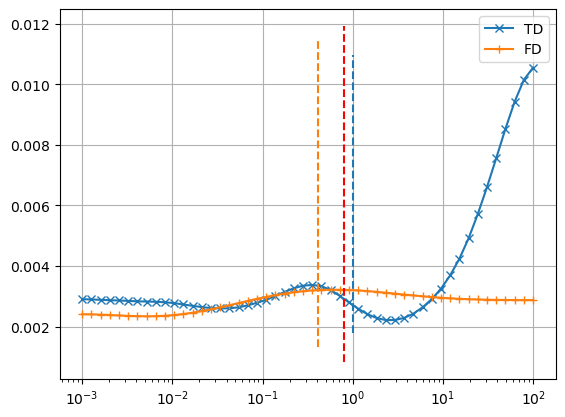

In [3]:
decay, spec = compareTDFD(m=0.2, tau=0.8, c=0.25)

<AxesSubplot:xlabel='t (s)', ylabel='v (mV/V)'>

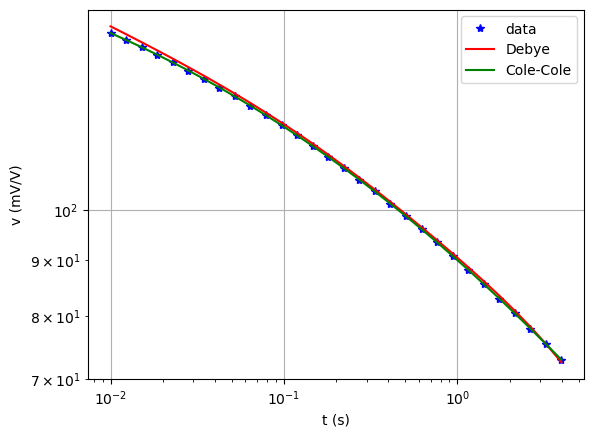

In [4]:
decay.showAll(xScale="log", yScale="log")

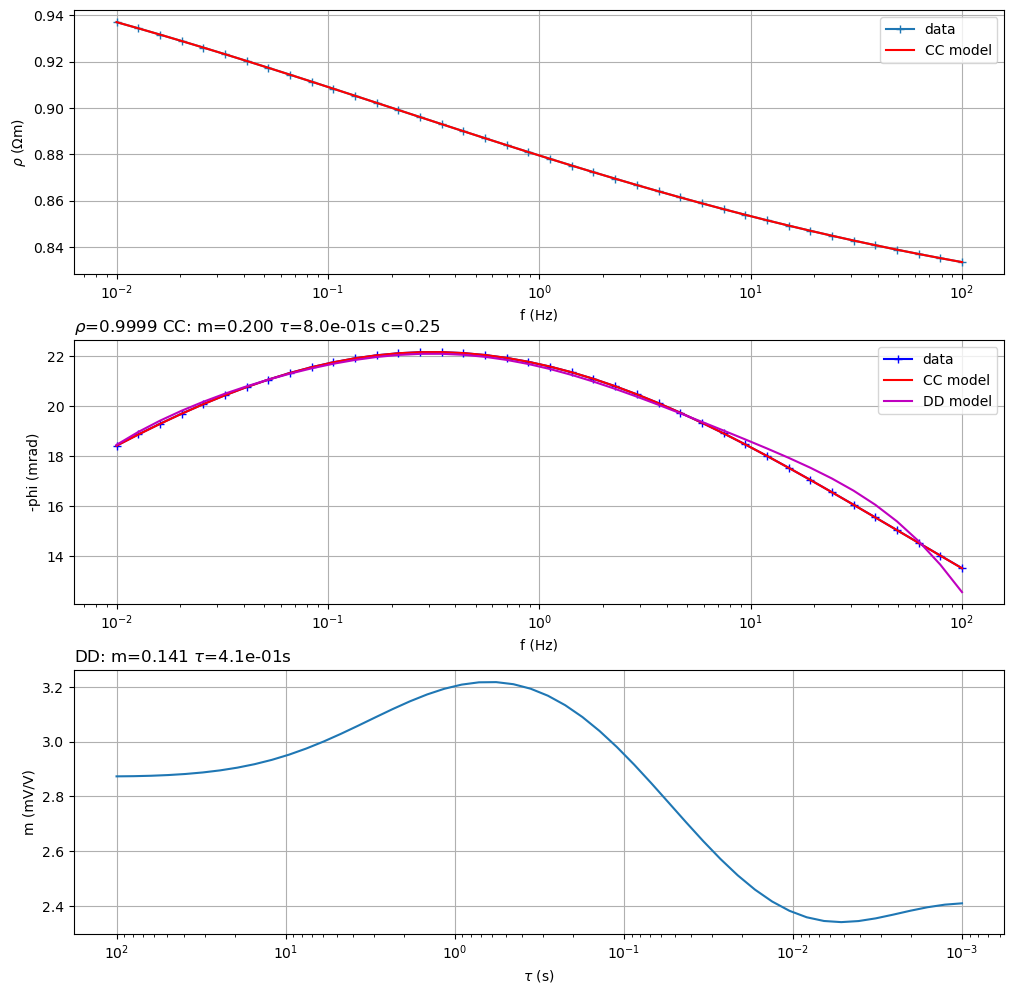

(<Figure size 1200x1200 with 3 Axes>,
 array([<AxesSubplot:xlabel='f (Hz)', ylabel='$\\rho$ ($\\Omega$m)'>,
        <AxesSubplot:title={'left':'$\\rho$=0.9999 CC: m=0.200 $\\tau$=8.0e-01s c=0.25 '}, xlabel='f (Hz)', ylabel='-phi (mrad)'>,
        <AxesSubplot:title={'left':'DD: m=0.141 $\\tau$=4.1e-01s'}, xlabel='$\\tau$ (s)', ylabel='m (mV/V)'>],
       dtype=object))

In [5]:
spec.showAll()